In [5]:
import time
import random
import matplotlib.pyplot as plt

# Here is an insertion_sort function for the Insertion_sort algorithm
def insertion_sort(arr):
    operations = 0
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        operations += 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
            operations += 1
        arr[j + 1] = key 

    return arr, operations

In [6]:
# Here is a quicksort function for the Quicksort algorithm
def quicksort(arr):
    if len(arr) <= 1:
        return arr, 0

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    sorted_left, ops_left = quicksort(left)
    sorted_right, ops_right = quicksort(right)

    return sorted_left + middle + sorted_right, ops_left + ops_right + 1

In [37]:
# Here is a merge_sort function for the MergeSort algorithm and a helper function merge to merge two sorted arrays
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        # Recursive call on each half
        left_half, ops_left = merge_sort(left_half)
        right_half, ops_right = merge_sort(right_half)

        # Merge the two sorted halves
        merged_arr, merge_ops = merge(left_half, right_half)

        return merged_arr, ops_left + ops_right + merge_ops
    else:
        return arr, 0

def merge(left, right):
    merged = []
    operations = 0
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
        operations += 1

    # Append the remaining elements
    merged.extend(left[i:])
    merged.extend(right[j:])

    return merged, operations


list length, Time Taken and Number of op. below referes to insertion-Sort algorithm 

List Length    Time Taken (ms)    Number of op.
1000           54.44025993347168  248304
2000           293.259859085083  993983
3000           733.7436676025391  2248142
4000           1243.3249950408936  4005736
5000           1917.8996086120605  6361244
6000           2470.2720642089844  9051739
7000           3087.1689319610596  12281684
8000           2524.0561962127686  15955237
9000           3482.1720123291016  20353112
10000          4399.735927581787  24941519


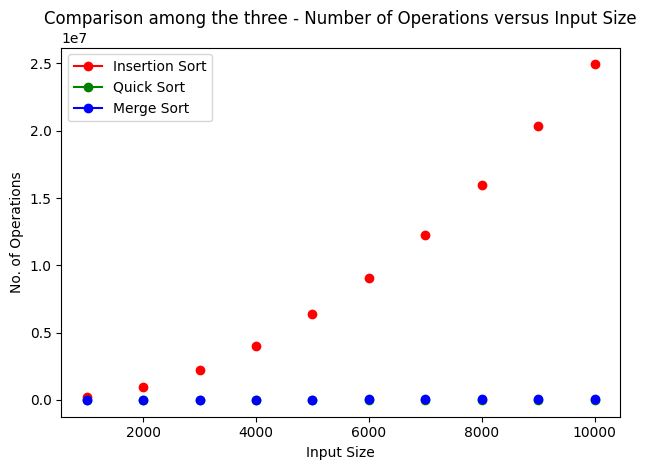

sample gragh for insertion-Sort


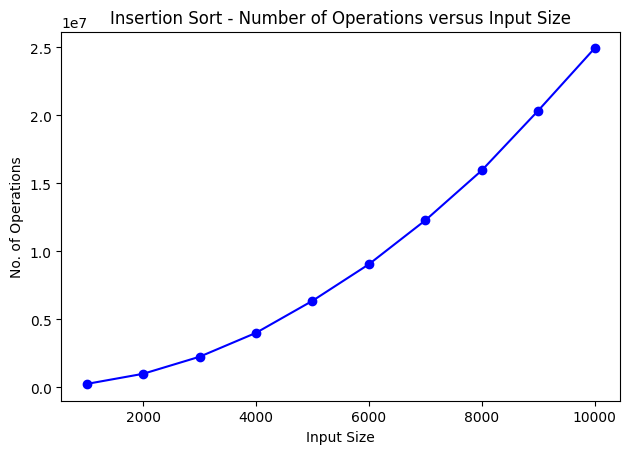

In [45]:
def generate_and_plot_data(start, end, step):
   
    length = []
    execution_time  = []
    number_of_operations = []
    colors = ['red', 'green', 'blue']
    
    # to display table that shows list length, Time Taken and Number of op. of each algorithm below is for insertion-Sort 
    print("list length, Time Taken and Number of op. below referes to insertion-Sort algorithm \n")
    print(f"{'List Length': <15}{'Time Taken (ms)  ': <15}{'  Number of op.'}")
    for size in range(start, end + step, step):
        
        arr_ascending = list(range(1, size, +1))  # Generate ascending ordered list of unique integers  
        arr_descending = list(range(size, 0, -1))  # Generate descending ordered list of unique integers 
        arr_random = random.sample(range(1, size + 1), size)     # Generate a random list of unique integers without duplication
      
    # here i recorded the time for insertion-Sort 
    # but we can record the time taken to complete the sort for each algorithm separately one after the other  
        start_time = time.time()
        i_execution_time, i_operations = insertion_sort(arr_random)
        end_time = time.time()
        q_execution_time, q_operations = quicksort(arr_random)
        m_execution_time, m_operations = merge_sort(arr_random)
        i_execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        print(f"{size:<15}{i_execution_time:<15}  {  i_operations:}")

        
        length.append(size)
    # storing values for insertion sort
        number_of_operations.append(i_operations)
        execution_time .append(i_execution_time)

    # Plotting sample for Comparison among the three
        for ops, color in zip([i_operations, q_operations,  m_operations], colors):
          plt.plot(size, ops, marker='o',  color=color)
    plt.ylabel('No. of Operations')
    plt.title('Comparison among the three - Number of Operations versus Input Size')
    plt.xlabel('Input Size')
    plt.legend(['Insertion Sort','Quick Sort', 'Merge Sort' ])
    plt.tight_layout()
    plt.show()

    # Plotting sample for individual algorithm example below is for insertion-Sort 
    print('sample gragh for insertion-Sort') 
    plt.plot(length, number_of_operations, marker='o', color='blue')
    plt.title('Insertion Sort - Number of Operations versus Input Size')
    plt.xlabel('Input Size')
    plt.ylabel('No. of Operations')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    start_size = 1000
    end_size = 10000
    step_size = 1000

    generate_and_plot_data(start_size, end_size, step_size)